In [1]:
import os 
import numpy as np 
import pandas as pd 

from keras import optimizers, losses, activations, models 
from keras.layers import Convolution2D, Dense, Input, Flatten, Dropout, MaxPooling2D, BatchNormalization 
from sklearn.model_selection import train_test_split
import keras
import librosa
import matplotlib.pyplot as plt

import IPython.display

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [16]:
#Getting the path to the audio folders

TestPath ='data/test/audio'
TrainPath = 'data/train/audio'

PermitedLabels = ['yes','no','up','down','left','right','on','off','stop','go','silence','unknown']

TestSubPath = [x.name for x in os.scandir(TestPath)] # Get name of subdirectories or files
TrainSubPath = [x.name for x in os.scandir(TrainPath)] # Get name of subdirectories or files

TrainSubPath.remove('_background_noise_')#remove directory of background noises 


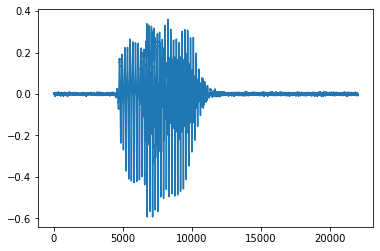

In [18]:
#Example of file load, plot and playback 
audio, sr = librosa.load('data/test/audio/'+TestSubPath[0])


plt.plot(audio) #Plotting the sound
plt.show()

IPython.display.Audio(audio,rate = sr)#Playing the sound

In [46]:
#Get audio files for training and testing (now only a subset is selected)
train = []
for folder in TrainSubPath:
    print(folder)
    label = folder
    if folder in PermitedLabels:
        fullpath = TrainPath + "/" + folder
        filepath = [x.name for x in os.scandir(fullpath)]
        for file in filepath: 
            audio, sr = librosa.load(fullpath + "/" + file)
            train.append([audio,sr,label])


bed
bird
cat
dog
down
eight
five
four
go
happy
house
left
marvin
nine
no
off
on
one
right
seven
sheila
six
stop
three
tree
two
up
wow
yes
zero


In [52]:
#create dataframe
nTrain = np.array(train)
df = pd.DataFrame(nTrain)

In [54]:
for t in train:
    print(len(t[0]))

22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
21404
17171
22050
22050
15054
20699
22050
22050
22050
22050
18817
22050
22050
22050
22050
20699
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
20481
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
18817
22050
21640
22050
15995
16935
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
17409
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
17409
22050
2205

22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
15054
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
16935
17876
22050
22050
22050
22050
22050
22050
22050
22050
22050
19757
18817
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
21505
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
18817
22050
22050
22050
22050
22050
22050
2205

22050
22050
22050
22050
22050
11290
13173
22050
18817
16385
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
21640
19757
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
15995
22050
22050
22050
22050
22050
22050
22050
22050
13826
22050
22050
22050
22050
22050
22050
22050
22050
16385
22050
22050
22050
22050
20699
22050
22050
22050
22050
15995
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
20481
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
20481
22050
22050
22050
22050
22050
22050
13313
22050
22050
22050
22050
21640
22050
22050
19757
22050
22050
16385
13313
17409
22050
22050
22050
22050
13173
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
19757
20699
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
19757
22050
22050
22050
22050
2164

22050
22050
22050
22050
22050
22050
21640
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
19457
22050
17876
22050
22050
22050
22050
22050
22050
20699
20699
22050
22050
22050
17876
14112
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
17876
21640
22050
22050
22050
22050
21505
22050
22050
22050
22050
22050
22050
22050
21640
22050
22050
22050
22050
15995
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
20883
20883
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
20481
21505
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
21640
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
15995
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
2205

22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
15054
16935
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
21505
22050
22050
22050
22050
17409
22050
22050
22050
21640
21640
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
15361
22050
22050
22050
22050
22050
14112
15995
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
14112
22050
22050
22050
20481
22050
18433
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
17409
19457
17409
22050
22050
22050
22050
22050
22050
22050
21640
22050
22050
22050
22050
17876
22050
22050
22050
22050
19457
19457
22050
22050
22050
22050
22050
21640
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
2205

22050
22050
22050
20699
21640
15995
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
20699
22050
22050
22050
22050
22050
20481
21505
22050
22050
22050
22050
22050
20481
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
21640
22050
22050
22050
22050
22050
22050
22050
22050
22050
19757
22050
18817
21505
22050
22050
22050
22050
22050
22050
22050
19757
22050
21640
22050
19757
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
19757
22050
22050
21640
22050
22050
22050
20699
22050
22050
22050
22050
22050
22050
21640
22050
22050
22050
22050
22050
22050
19757
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
1599

22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
15995
22050
22050
22050
22050
22050
22050
22050
20699
22050
22050
22050
22050
22050
22050
18433
19457
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
17876
21505
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
14112
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
20699
17876
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
2205

15995
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
21505
15054
22050
22050
22050
22050
22050
22050
22050
21505
22050
22050
22050
22050
22050
22050
22050
19457
22050
22050
22050
22050
22050
20699
20481
21640
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
20699
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
17876
22050
14112
17876
21640
19757
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
20481
22050
22050
22050
22050
22050
22050
20481
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
12231
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
15054
16935
19757
22050
22050
22050
2205

22050
21640
22050
22050
22050
22050
22050
22050
22050
22050
22050
21640
22050
22050
22050
18817
22050
17409
22050
22050
22050
22050
22050
15995
18817
20699
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
21640
21640
22050
22050
22050
22050
22050
22050
16935
17876
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
13313
22050
22050
22050
22050
22050
17640
16465
22050
22050
22050
22050
22050
22050
22050
19757
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
21640
22050
22050
22050
22050
22050
22050
22050
22050
17876
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
1129

22050
22050
22050
22050
21505
22050
22050
22050
22050
22050
18433
16385
22050
22050
22050
22050
22050
22050
22050
22050
17876
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
20481
20481
22050
22050
22050
14112
22050
22050
22050
22050
22050
22050
21640
20481
22050
18433
18433
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
15995
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
19457
17409
16385
22050
22050
22050
22050
22050
22050
21505
19457
22050
22050
22050
20481
22050
15995
22050
22050
22050
22050
22050
22050
22050
22050
22050
21505
22050
22050
14112
22050
18817
22050
20481
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
20699
16935
14112
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
20699
18817
22050
22050
2205

22050
22050
22050
22050
22050
18433
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
19457
16385
14337
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
21505
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
18817
22050
17876
22050
22050
22050
21640
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
2205

22050
22050
22050
22050
22050
16935
22050
22050
22050
22050
22050
22050
20481
22050
15995
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
20699
17876
22050
22050
22050
22050
22050
22050
22050
18817
21640
16935
16935
22050
22050
22050
22050
22050
20699
22050
22050
22050
22050
22050
22050
19757
22050
17876
18817
22050
22050
22050
22050
22050
22050
16385
13313
18433
15361
22050
20229
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
19457
22050
22050
22050
22050
22050
22050
22050
21640
22050
20699
20481
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
13173
17876
22050
22050
22050
22050
18817
20481
22050
19757
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
21168
10350
17876
2205

22050
22050
20481
17409
21505
18433
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
21640
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
20481
22050
20481
20481
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
19757
19757
18817
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
15054
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
21640
22050
22050
22050
22050
22050
22050
20481
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
21640
22050
22050
22050
22050
22050
21168
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
22050
21640
2205